In [1]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 22.2 MB 38.3 MB/s            
     |████████████████████████████████| 306 kB 41.4 MB/s            
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [10]:
def load_dataset():
  url = "iris.csv"
  dataset = pd.read_csv(url)
  return dataset
  
dataset = load_dataset()

In [11]:
def summarize_dataset(dataset):
  print(f"Dataset dimension:\n{dataset.shape}\n")
  print(f"First 10 rows of dataset:\n{dataset.head(10)}\n")
  print(f"Statistical summary:\n{dataset.describe()}\n")
  print(f"Class Distribution:\n{dataset.groupby('class').size()}")
  
summarize_dataset(dataset)

Dataset dimension:
(150, 5)

First 10 rows of dataset:
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

Statistical summary:
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.7586

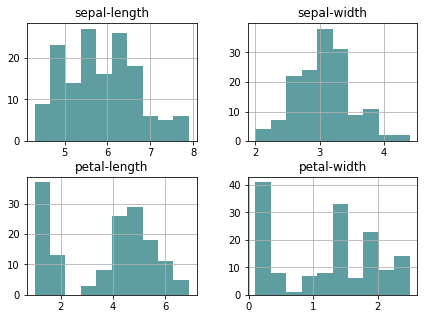

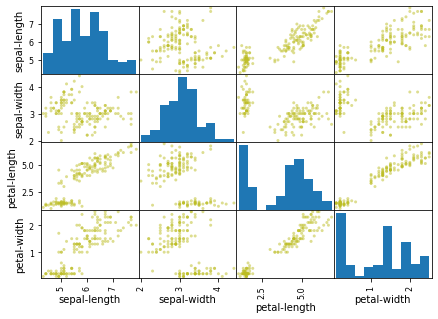

In [12]:
def print_plot_univariate(dataset):
  dataset.hist(figsize = (7, 5), color = 'cadetblue')
  pyplot.show()


def print_plot_multivariate(dataset):
  scatter_matrix(dataset, figsize = (7, 5), color = 'tab:olive')
  pyplot.show()

print_plot_univariate(dataset)
print_plot_multivariate(dataset)

In [13]:
def my_print_and_test_models(dataset):
  array = dataset.values
  X = array[:,0:4]
  y = array[:,4]
  X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.20, random_state = 1)
  
  # DecisionTree
  model_1 = DecisionTreeClassifier()
  cv_results_1 = cross_val_score(model_1, X_train, Y_train, cv = KFold(n_splits = 2), scoring='accuracy')
  print('%s: %f (%f)' % ("DecisionTree", cv_results_1.mean(), cv_results_1.std()))
  # GaussianNB
  model_2 = GaussianNB()
  cv_results_2 = cross_val_score(model_2, X_train, Y_train, cv = KFold(n_splits = 2), scoring='accuracy')
  print('%s: %f (%f)' % ("GaussianNB", cv_results_2.mean(), cv_results_2.std()))
  # KNeighbors
  model_3 = KNeighborsClassifier()
  cv_results_3 = cross_val_score(model_3, X_train, Y_train, cv = KFold(n_splits = 2), scoring='accuracy')
  print('%s: %f (%f)' % ("KNeighbors", cv_results_3.mean(), cv_results_3.std()))
  # LogisticRegression
  model_4 = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
  cv_results_4 = cross_val_score(model_4, X_train, Y_train, cv = KFold(n_splits = 2), scoring='accuracy')
  print('%s: %f (%f)' % ("LogisticRegression", cv_results_4.mean(), cv_results_4.std()))
  # LinearDiscriminant
  model_5 = LinearDiscriminantAnalysis()
  cv_results_5 = cross_val_score(model_5, X_train, Y_train, cv = KFold(n_splits = 2), scoring='accuracy')
  print('%s: %f (%f)' % ("LinearDiscriminant", cv_results_5.mean(), cv_results_5.std()))
  # SVM
  model_6 = SVC(gamma = 'auto')
  cv_results_6 = cross_val_score(model_6, X_train, Y_train, cv = KFold(n_splits = 2), scoring='accuracy')
  print('%s: %f (%f)' % ("SVM", cv_results_6.mean(), cv_results_6.std()))

my_print_and_test_models(dataset)

DecisionTree: 0.900000 (0.000000)
GaussianNB: 0.950000 (0.016667)
KNeighbors: 0.941667 (0.025000)
LogisticRegression: 0.891667 (0.041667)
LinearDiscriminant: 0.975000 (0.008333)
SVM: 0.966667 (0.016667)


In [15]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v3.1.1-c2fe00c (production)
Loading parameters:  OK
User mirzayev_o connection: OK


<MY_OPEN_THE_IRIS>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY OPEN THE IRIS 

 Status             SUCCESS          
 Execution Runtime  4.222542         
 Score              [====] 4/4       


Checks detail Report:

 TEST LOAD DATASET  SUCCESS 



 TEST PRINT PLOT MULTIVARIATE  SUCCESS 



 TEST PRINT PLOT UNIVARIATE  SUCCESS 



 TEST SUMMARIZE DATASET  SUCCESS 


</MY_OPEN_THE_IRIS>
